<a href="https://colab.research.google.com/github/priyshinde/LGMVIP-DataScience/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Priyanka Shinde**
## ***Data Science Intern at Let's Grow More(LGMVIP) January,2022***
### *Prediction using Decision Tree  Algorithm*

**Step-1:Importing the required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

**Step-2:Loading the Dataset**

In [ ]:
Iris_data = pd.read_csv('Iris.csv')

**Step-3:Exploratory Data Analysis**

In [ ]:
#Basic information regarding dataset
Iris_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Showing first 5 values
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# No. of rows and columns
Iris_data.shape 

(150, 6)

In [ ]:
Iris_data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
Iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
Iris_data=Iris_data.set_index("Id")
Iris_data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


**Step-4:Data Visualization Comparing Various Features**

<function matplotlib.pyplot.show>

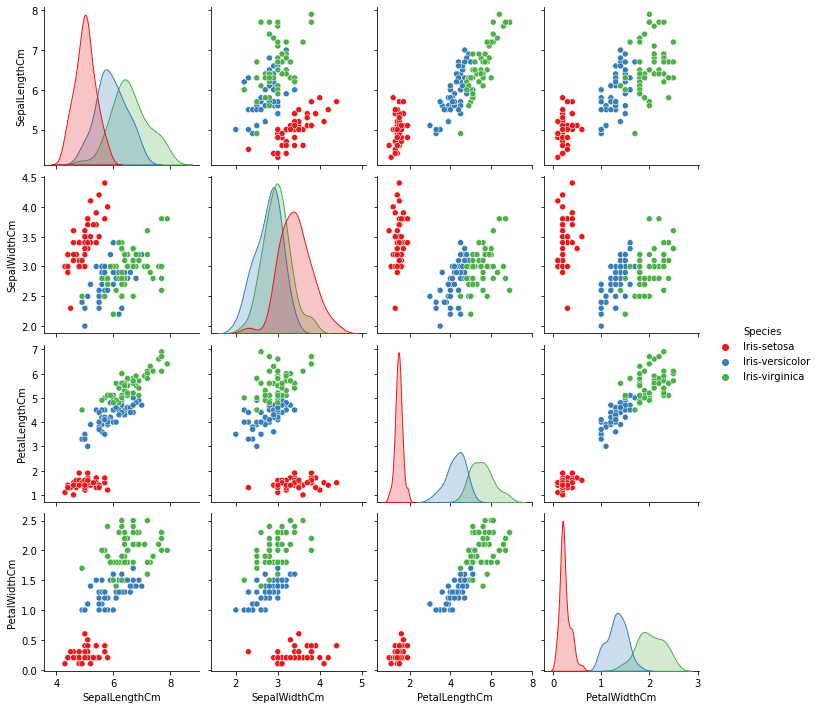

In [ ]:
sns.pairplot(Iris_data,hue='Species',palette='Set1')
plt.show

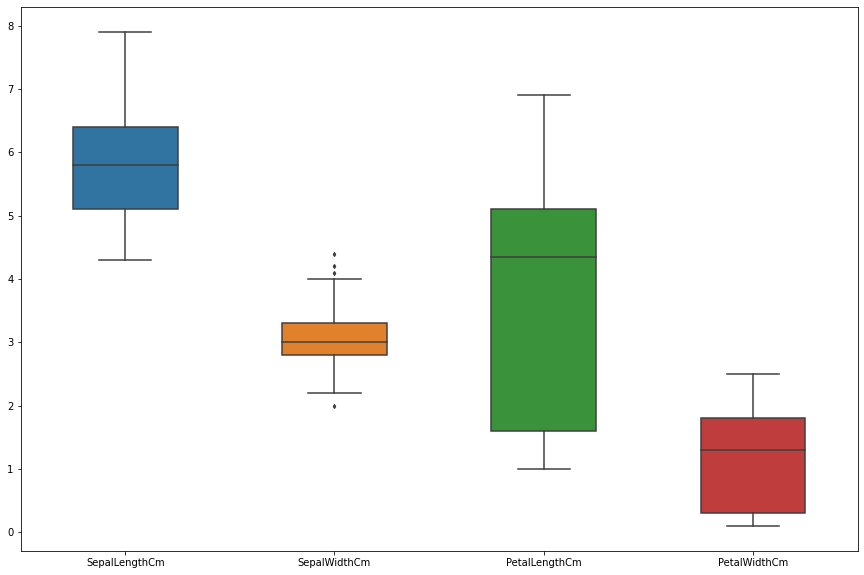

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=Iris_data, width= 0.5, ax=ax, fliersize=3)

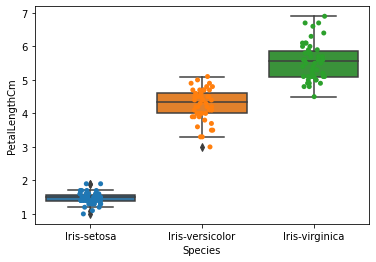

In [ ]:
plot= sns.boxplot(x= 'Species', y= 'PetalLengthCm', data= Iris_data)
plot=sns.stripplot(x= 'Species', y= 'PetalLengthCm', data= Iris_data)

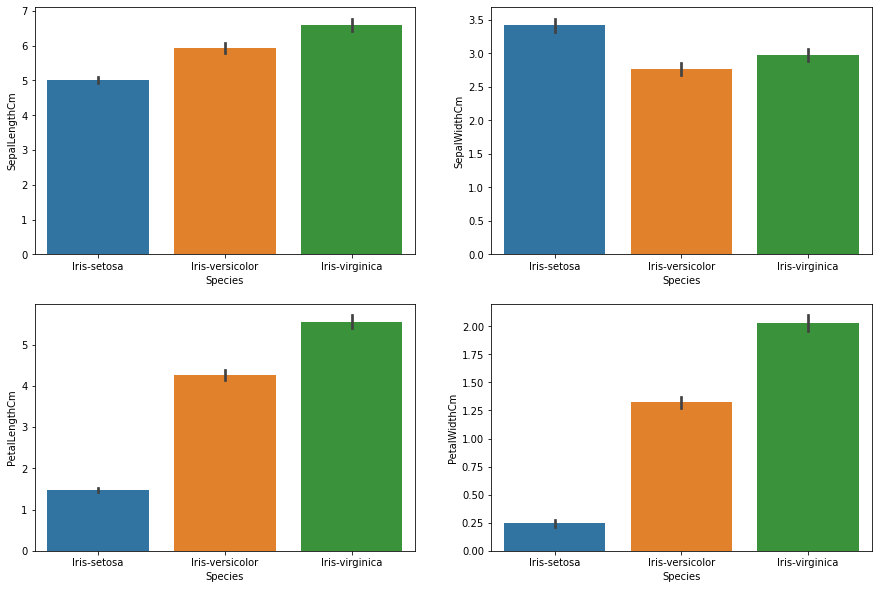

In [ ]:
#Barplot 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data=Iris_data)
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data=Iris_data)
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data=Iris_data)
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data=Iris_data)

**Step-5:Decision Tree Model Training**

In [ ]:
Iris_data['Species_class']=np.where(Iris_data.Species=='Iris-virginica',1,np.where(Iris_data.Species=='Iris-versicolor',2,3))

In [ ]:
Iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

In [ ]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [ ]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( Iris_data[cols],
                                                  Iris_data['Species_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

In [ ]:
#Model Building
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [ ]:
tree.best_score_

0.95

In [ ]:
tree.best_estimator_
tree.best_params_
train_pred = tree.predict(train_X)
test_pred = tree.predict(test_X)
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



**Step-6:Comparing the Actual and Predicted Flower Classification**

In [ ]:
#Building Final Decision Tree
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )
tree_test_pred.sample( n = 10 )

,actual,predicted
Id,,
128,1,1
43,3,3
21,3,3
89,2,2
133,1,1
5,3,3
25,3,3
60,2,2
38,3,3


**Step-7:Graphical Representation of Decision Tree**

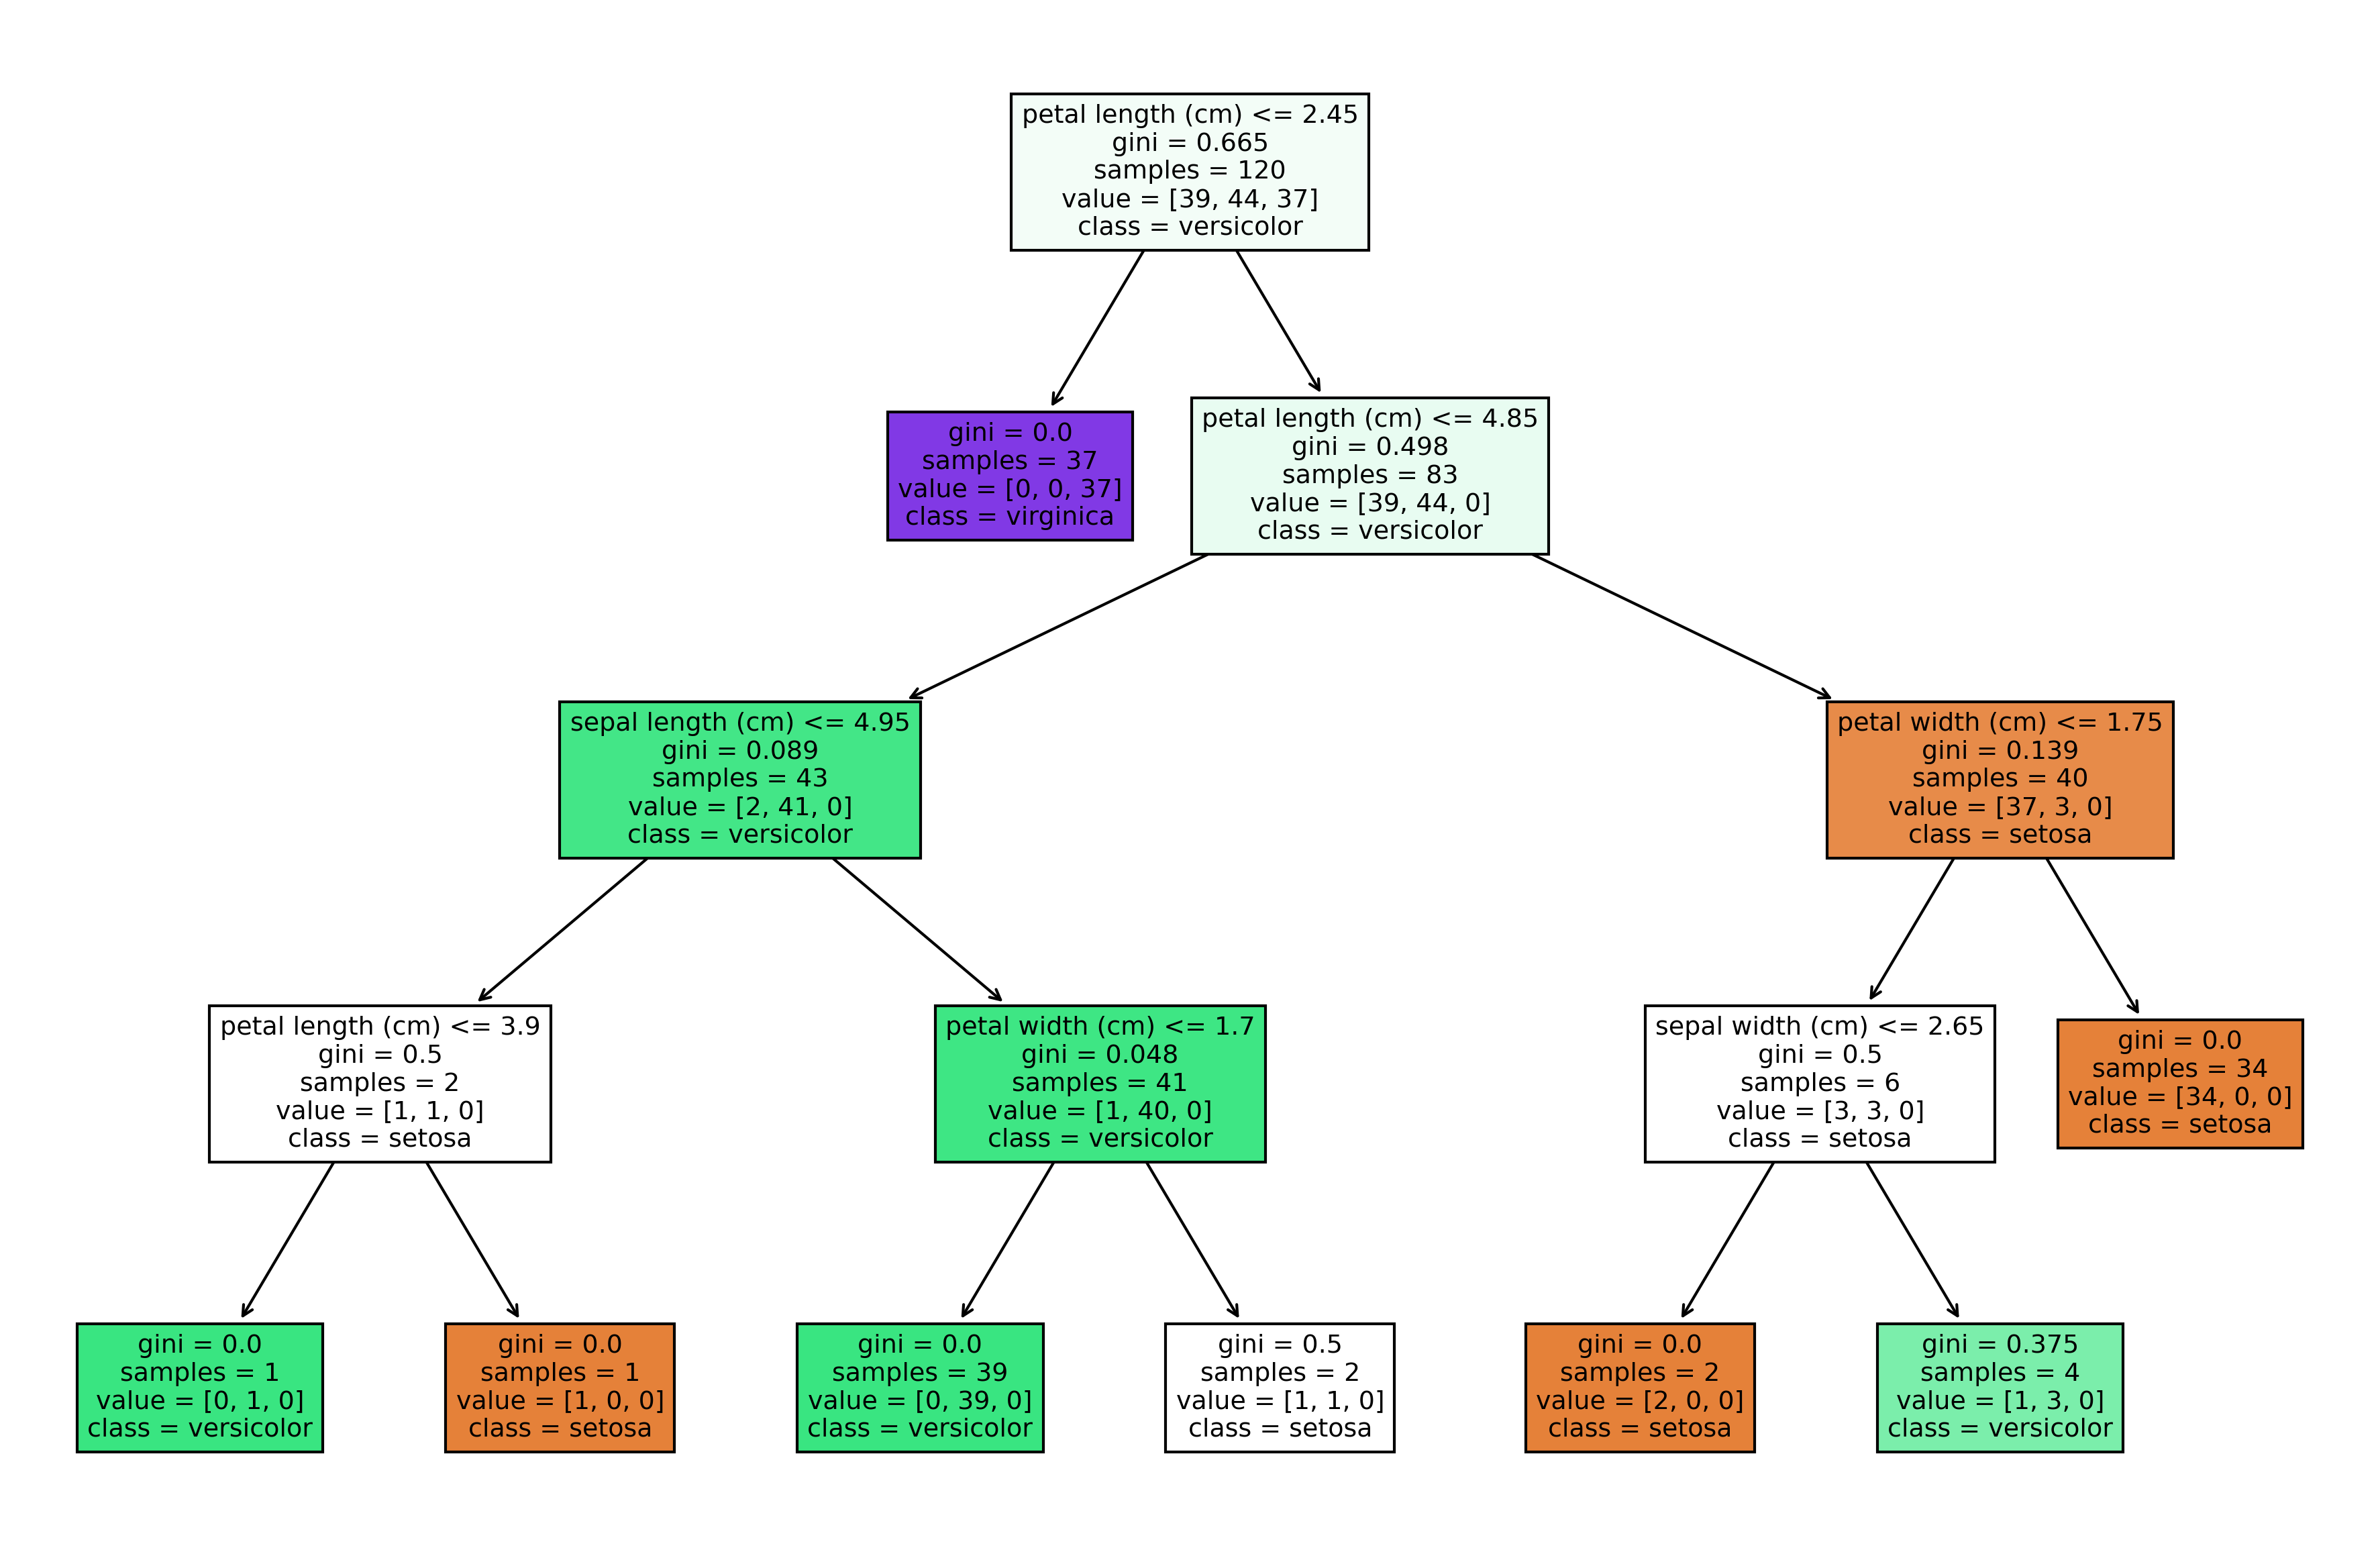

In [ ]:
#Graphical Representation of Decision Tree
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

**Step-8:Testing our model for some random values of petal and sepal length and width.**

In [ ]:
# Estimating Class Probabilities
trial=np.array([[4.7,3.2,1.3,0.2]])
pred_trial=clf_tree.predict(trial)
print(pred_trial)
print("Our Model Predicts the class as 3, that is Iris-Setosa")

[3]
Our Model Predicts the class as 3, that is Iris-Setosa


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


**Step-9:Calculating the Model Accuracy**

In [ ]:
accuracy=metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )*100
print("Accuracy of model is {:.2f}".format(accuracy))

Accuracy of model is 96.67


# ***Thank you***